## Content
----

### [Image Enhancing](#image_enhancing)
- [X] RGB → BGR → HSV
    - Play HSV with slider
    - Color the gray scale Image
- [X] Gray Scale Transform
    - Negative
    - Log Transform, Gamma Correction


### [Morphological Transforms](#morphological)
- [X] Erosion, Dilation
- [X] Opening, Closing, Hit Or Miss


In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

def imShow(imgs, titles=None):
    num = len(imgs)
    x = (num//4)+1
    y = int(np.ceil(num/x))
    plt.figure(figsize=(18,15))
    for i in range(num):
        plt.subplot(x, y, i+1)
        cmap=None
        title=None
        if imgs[i].ndim==2:cmap='gray'
        if titles!=None:title=titles[i]
        plt.imshow(imgs[i], cmap=cmap)
        plt.title(title)
    plt.tight_layout()
    plt.show()

<a id='image_enhancing'></a>
### Image Enhancing

#### RGB -> BGR -> HSV
- [X] Play with slider
- [X] Grayscale to Heatmap

HSV Added : 0, 0, 0


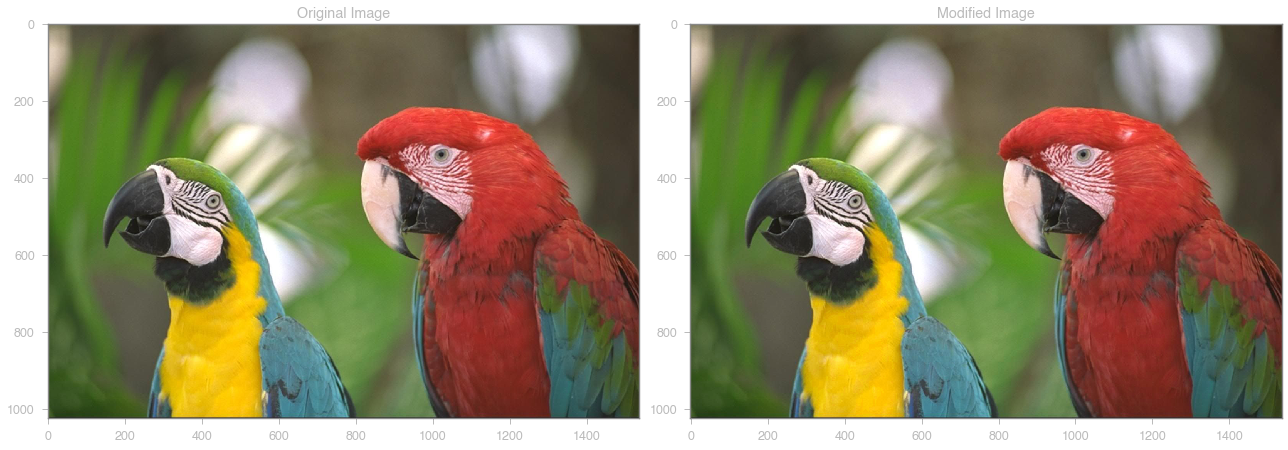

In [3]:
from ipywidgets import interact, widgets, Layout, interactive

def addHue(hue=0, saturation=0, value=0):
    img = mpimg.imread('parrot.jpg')
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    hsv = hsv.astype(np.int16)

    # Change here
    h = hsv[:, :, 0];s = hsv[:, :, 1];v = hsv[:, :, 2]
    h *= 2
    h += hue;s += saturation;v += value
    h[h>358] -= 359; h[h<0] += 359
    s[s<0]=0;s[s>255]=255
    v[v<0]=0;v[v>255]=255
    h = h/2
    
    hsv = np.dstack((h, s, v)).astype(np.uint8)
    revered = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    print(f"HSV Added : {hue}, {saturation}, {value}")
    imShow([img, revered], ['Original Image', 'Modified Image'])
    
    
hue = widgets.IntSlider(min=-180, max=180, step=10, value=0, continuous_update=False ,layout=Layout(width='60%', height='20px'))
saturation = widgets.IntSlider(min=-100, max=100, step=10, value=0, continuous_update=False ,layout=Layout(width='60%', height='20px'))
value = widgets.IntSlider(min=-100, max=100, step=10, value=0, continuous_update=False ,layout=Layout(width='60%', height='20px'))

interactive(addHue, hue=hue, saturation=saturation, value=value)

In [21]:
# Why HSV
def colorpicker(r, g=0, b=0):
    print('RGB \t: ', r, g, b)
    r = np.zeros((30,30))+r
    g = np.zeros((30,30))+g
    b = np.zeros((30,30))+b
    temp = np.array(np.dstack((r, g, b)), dtype=np.uint8)
    hsv = cv2.cvtColor(temp, cv2.COLOR_RGB2HSV)
    h = hsv[:, :, 0];s = hsv[:, :, 1];v = hsv[:, :, 2]
    print('HSV \t', h[0,0], s[0,0], v[0,0])
    plt.imshow(temp);plt.show()
    
r = widgets.IntSlider(min=0, max=255, step=5, value=0, continuous_update=False, layout=Layout(width='55%', height='20pt'))
g = widgets.IntSlider(min=0, max=255, step=5, value=0, continuous_update=False, layout=r.layout)
b = widgets.IntSlider(min=0, max=255, step=5, value=0, continuous_update=False, layout=r.layout)
interactive(colorpicker, r=r, g=g, b=b)

interactive(children=(IntSlider(value=0, continuous_update=False, description='r', layout=Layout(height='10pt'…

### Question?

Why would we could HSV while we already have RGB?

#### Gray Scale Transform
- [X] Negative
- [X] Log Transform, Gamma Transform

<br>

-----
##### P.S Here, We show with just gray scale, But you can always try with all 3 Color spaces and stack them later with 
> np.dstack((r, g, b))

In [4]:
from ipywidgets import interact


def gamma_correction(gamma=1):
#     for img_name in img_names:
    img = mpimg.imread('tree.jpg')
    if img.ndim==3:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    r = 1/gamma
    result = (img/255)**r
    print(gamma)
    imShow([img, result], ['Original image', 'Gamma Correction'])


gamma = widgets.FloatSlider(min=0.5, max=2.0, step=0.1, continuous_update=False, layout=Layout(width='60%', height='10pt'))

interactive(gamma_correction, gamma=gamma)

<a id='morphological'></a>
### [Morphological Transformations](https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html)

In [42]:
img = mpimg.imread('cells.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.medianBlur(gray, 5)
gray = gray[30:, :]

# Let's do some thresholding
thresh = np.zeros_like(gray)
# threshold value here get by trial and error
thresh[gray>175] = 1

from ipywidgets import interact
# Let's play around
def basicMorph(kernel_size=3, iterations=1):
    print(f'Kernel Size : \t{kernel_size}\nIterations : \t{iterations}')
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    erode = cv2.erode(thresh, kernel, iterations=iterations)
    dilate = cv2.dilate(thresh, kernel, iterations=iterations)
    imShow([thresh, erode, dilate],
           ['Input Image', 'Eroded image', 'Dilated Image'])


kernel_size = widgets.IntSlider(min=1, max=11, step=2, value=1, continuous_update=False, layout=r.layout)
iterations = widgets.IntSlider(min=1, max=10, step=1, value=1, continuous_update=False, layout=r.layout)
interactive(basicMorph, kernel_size=kernel_size, iterations=iterations)

interactive(children=(IntSlider(value=3, description='kernel_size', max=9, min=1, step=2), IntSlider(value=1, …